In [34]:
import pandas as pd
genetic_data = pd.read_csv("./data/aa.tsv", sep="\t")
pgx_data = pd.read_json("./data/pharmacogenomics/combined.json")
merged_data = pd.merge(
    genetic_data, pgx_data, left_on="rsid", right_on="variantRsId", how="inner"
)

relevant_data = merged_data[
    ["rsid", "genotype_x", "drugFromSource", "phenotypeText"]
]

print(relevant_data.head())

      rsid genotype_x drugFromSource  \
0  rs15524         AA  carbamazepine   
1  rs15524         AA     tacrolimus   
2  rs15524         AA  carbamazepine   
3  rs15524         AA  carbamazepine   
4  rs15524         AA     tacrolimus   

                                       phenotypeText  
0          increased concentrations of carbamazepine  
1  decreased dose-adjusted trough concentrations ...  
2          decreased concentrations of carbamazepine  
3          decreased concentrations of carbamazepine  
4  increased dose-adjusted trough concentrations ...  


In [36]:
grouped_data = (
    relevant_data.groupby("rsid")
    .apply(
        lambda x: x[["drugFromSource", "phenotypeText", "genotype_x"]].to_dict(orient="records")
    )
    .reset_index()
)

grouped_data.rename(columns={0: "Drug Impact"}, inplace=True)
print(grouped_data)

            rsid                                        Drug Impact
0      rs1001179  [{'drugFromSource': 'ethanol', 'phenotypeText'...
1     rs10011796  [{'drugFromSource': 'allopurinol', 'phenotypeT...
2     rs10028494  [{'drugFromSource': 'fentanyl', 'phenotypeText...
3     rs10030044  [{'drugFromSource': 'tamoxifen', 'phenotypeTex...
4     rs10042486  [{'drugFromSource': 'quetiapine', 'phenotypeTe...
...          ...                                                ...
1066   rs9940629  [{'drugFromSource': 'atenolol', 'phenotypeText...
1067   rs9973653  [{'drugFromSource': 'sorafenib', 'phenotypeTex...
1068   rs9977268  [{'drugFromSource': 'methotrexate', 'phenotype...
1069    rs997917  [{'drugFromSource': 'opioids', 'phenotypeText'...
1070   rs9981861  [{'drugFromSource': 'paclitaxel', 'phenotypeTe...

[1071 rows x 2 columns]


/tmp/ipykernel_61455/3420242392.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


In [38]:
merged_data = pd.merge(
        genetic_data, pgx_data, left_on="rsid", right_on="variantRsId", how="inner"
    )

relevant_data = merged_data[
    ["rsid", "genotype_x", "drugFromSource", "phenotypeText"]
]
grouped_data = (
    relevant_data.groupby(["rsid", "genotype_x"])
    .apply(
        lambda x: x[["drugFromSource", "phenotypeText", "genotype_x"]].to_dict(orient="records")
    )
    .reset_index()
)
grouped_data.rename(columns={0: "Drug Impact"}, inplace=True)
print(grouped_data)

            rsid genotype_x                                        Drug Impact
0      rs1001179         CC  [{'drugFromSource': 'ethanol', 'phenotypeText'...
1     rs10011796         TT  [{'drugFromSource': 'allopurinol', 'phenotypeT...
2     rs10028494         AA  [{'drugFromSource': 'fentanyl', 'phenotypeText...
3     rs10030044         GT  [{'drugFromSource': 'tamoxifen', 'phenotypeTex...
4     rs10042486         --  [{'drugFromSource': 'quetiapine', 'phenotypeTe...
...          ...        ...                                                ...
1066   rs9940629         GG  [{'drugFromSource': 'atenolol', 'phenotypeText...
1067   rs9973653         GG  [{'drugFromSource': 'sorafenib', 'phenotypeTex...
1068   rs9977268         CT  [{'drugFromSource': 'methotrexate', 'phenotype...
1069    rs997917         CC  [{'drugFromSource': 'opioids', 'phenotypeText'...
1070   rs9981861         TT  [{'drugFromSource': 'paclitaxel', 'phenotypeTe...

[1071 rows x 3 columns]


/tmp/ipykernel_61455/4016552502.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


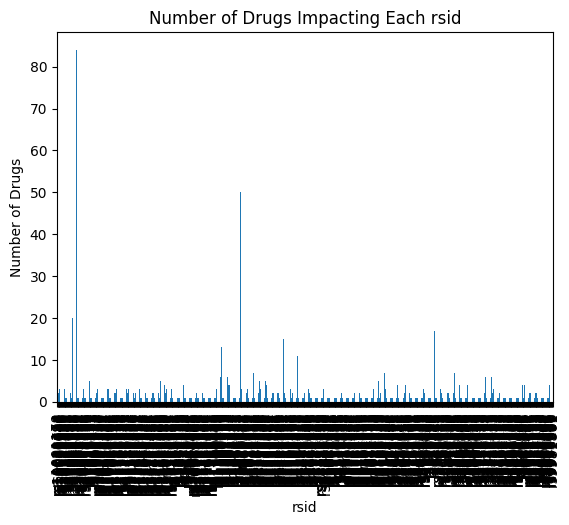

In [40]:
import matplotlib.pyplot as plt

impact_counts = relevant_data.groupby("rsid")["drugFromSource"].nunique()

impact_counts.plot(kind="bar")

plt.title("Number of Drugs Impacting Each rsid")
plt.xlabel("rsid")
plt.ylabel("Number of Drugs")
plt.show()

grouped_data.to_csv("drug_impact_per_rsid.csv", index=False)